# Ejercicio Completo de Análisis Exploratorio de Datos (EDA)

### Contexto del Problema:
La tienda "TechStore" desea analizar sus datos de ventas para optimizar su estrategia
comercial. Se te proporciona un dataset con información sobre las transacciones realizadas
en el último año.
### Objetivos del Análisis:
1. Limpieza de Datos:
- Identificar y tratar valores nulos o inconsistentes.
- Convertir tipos de datos según corresponda.
- Eliminar duplicados si existen.
- Detectar y manejar valores atípicos.
2. Análisis Univariado:
- Distribución de precios, cantidades vendidas y total de ventas.
- Análisis de las categorías y productos más vendidos.
3. Análisis Multivariado:
- Relación entre precios y cantidad vendida.
- Comparación de ingresos por método de pago.
- Tendencias de ventas a lo largo del tiempo.
- Análisis de clientes frecuentes vs. no frecuentes.
4. Segmentación y Patrones de Compra:
- Identificación de patrones de compra en función del tiempo (ventas diarias,
semanales, mensuales).
- Determinar si hay estacionalidad en las ventas.
- Análisis de ticket promedio según cliente frecuente y método de pago.
5. Conclusiones y Recomendaciones:
- Estrategias para mejorar las ventas según insights obtenidos.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('venta_tienda.csv')

In [48]:

# 1. Limpieza de Datos
# Identificar y tratar valores nulos o inconsistentes
df.isnull().sum()

ID_venta              0
Producto              0
Categoría             0
Precio               51
Cantidad              0
Total_Venta           0
Fecha_Venta           0
Método_Pago          50
Cliente_Frecuente     0
dtype: int64

In [49]:
# Tratar valores nulos
df['Precio'] = df['Precio'].fillna(df['Precio'].median())
df['Método_Pago'] = df['Método_Pago'].fillna(df['Método_Pago'].mode()[0])

In [50]:
# Convertir tipos de datos según corresponda
df.dtypes
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'])

In [51]:
# Eliminar duplicados si existen
df = df.drop_duplicates()

In [52]:
# Detectar y manejar valores atípicos
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Precio'] > lower_bound) & (df['Precio'] < upper_bound)]

df.reset_index(drop=True, inplace=True)

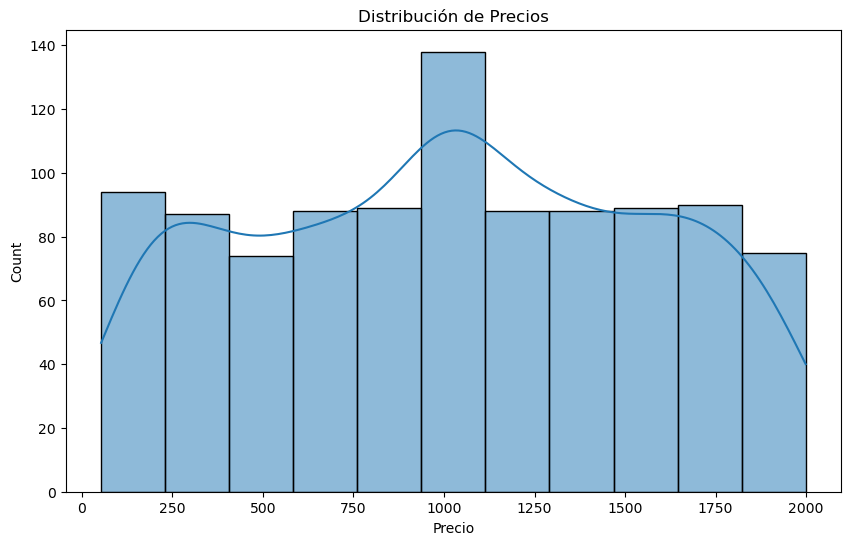

In [53]:

# 2. Análisis Univariado
# Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], kde=True)
plt.title('Distribución de Precios')
plt.show()

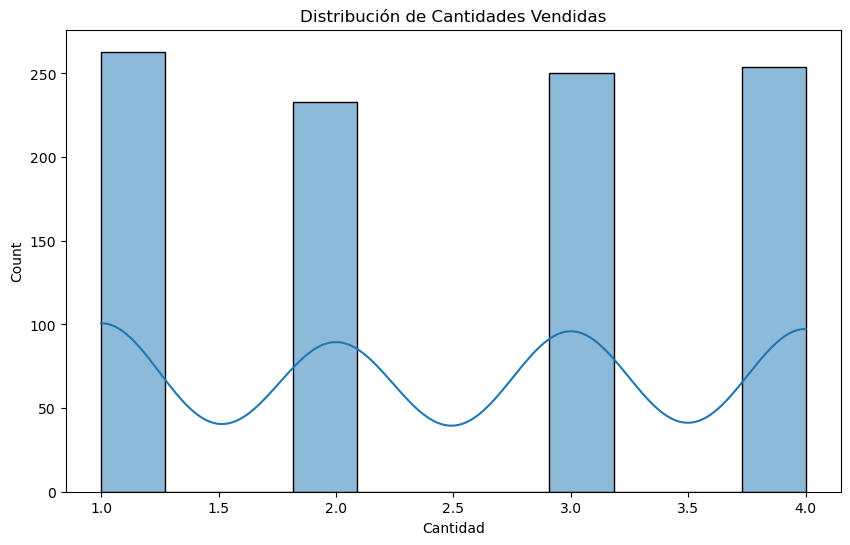

In [54]:
# Distribución de cantidades vendidas
plt.figure(figsize=(10, 6))
sns.histplot(df['Cantidad'], kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.show()

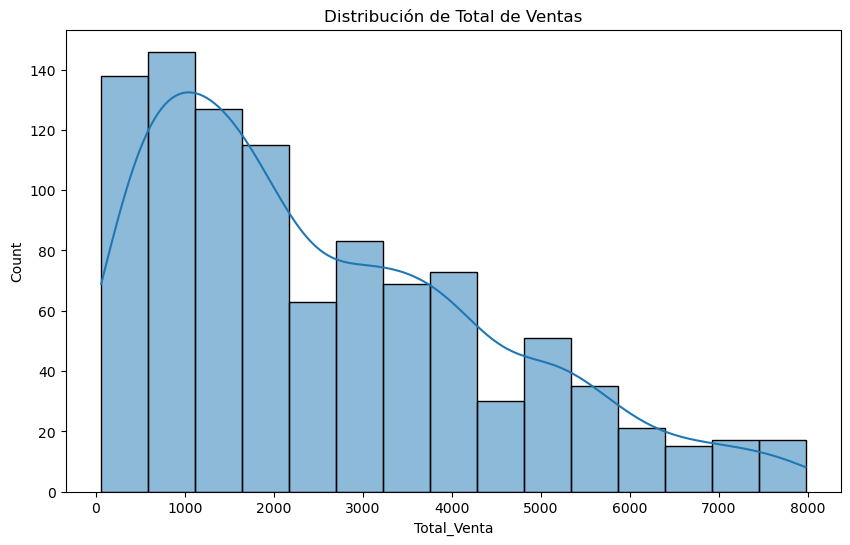

In [55]:
# Total de ventas
df['Total_Venta'] = df['Precio'] * df['Cantidad']
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Venta'], kde=True)
plt.title('Distribución de Total de Ventas')
plt.show()

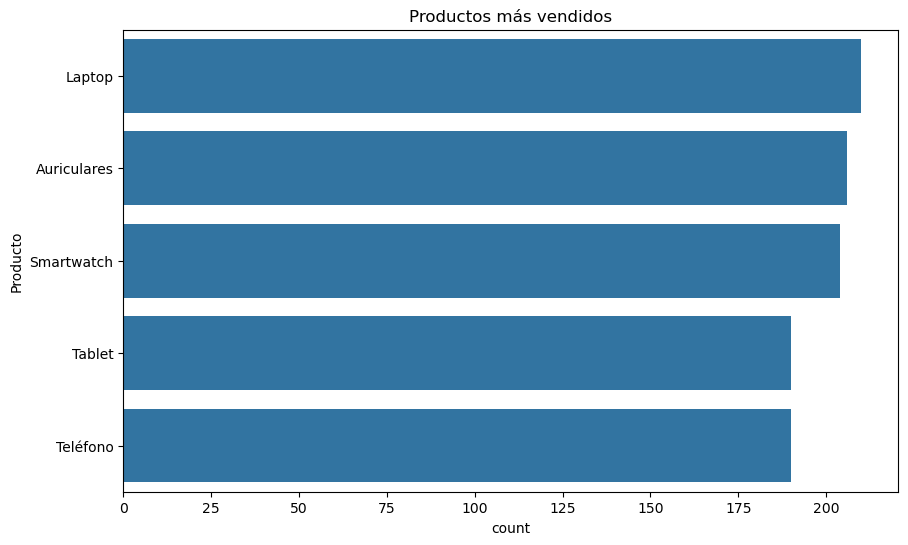

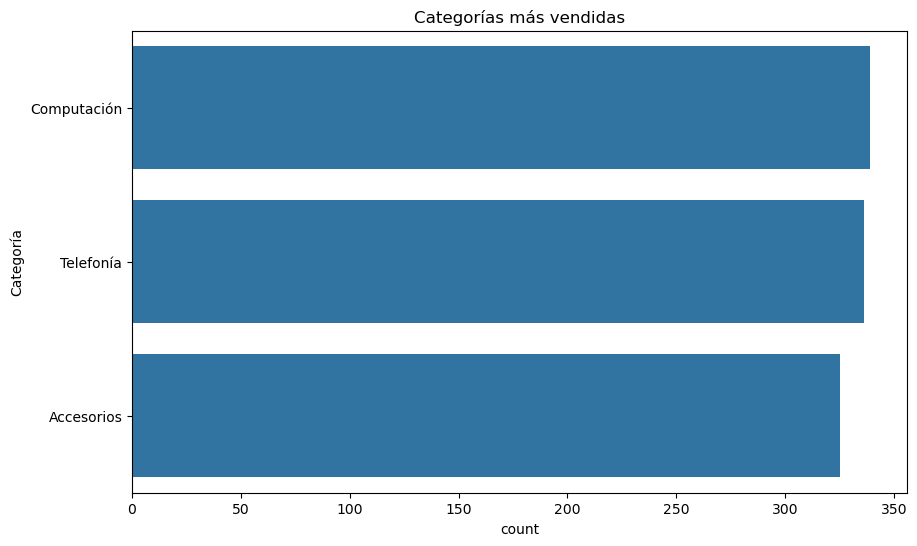

In [61]:

# Análisis de las categorías (df['Categoría']) y productos(df['Producto']) más vendidos
productos_mas_vendidos = df['Producto'].value_counts().head()
categorias_mas_vendidas = df['Categoría'].value_counts().head()

# Visualización de los productos más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos, y=productos_mas_vendidos.index)
plt.title('Productos más vendidos')
plt.show()

# Visualización de las categorías más vendidas
plt.figure(figsize=(10, 6))
sns.barplot(x=categorias_mas_vendidas, y=categorias_mas_vendidas.index)
plt.title('Categorías más vendidas')
plt.show()

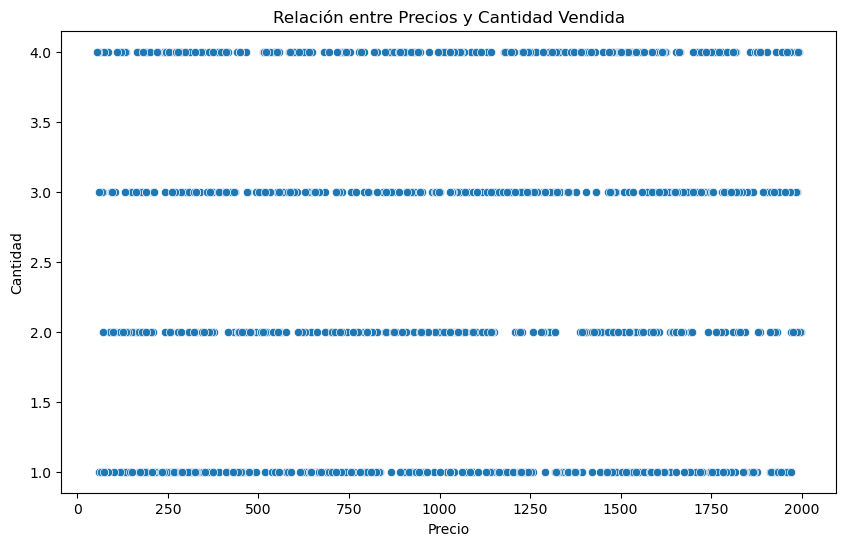

In [62]:
# 3. Análisis Multivariado
# Relación entre precios y cantidad vendida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precio', y='Cantidad', data=df)
plt.title('Relación entre Precios y Cantidad Vendida')
plt.show()

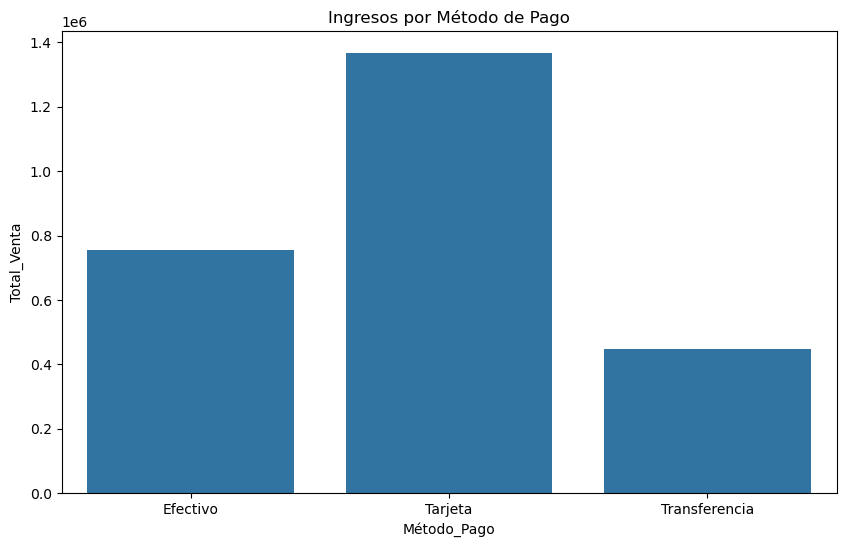

In [66]:
# Comparación de ingresos por método de pago
ingresos_por_metodo_pago = df.groupby('Método_Pago')['Total_Venta'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Método_Pago', y='Total_Venta', data=ingresos_por_metodo_pago)
plt.title('Ingresos por Método de Pago')
plt.show()

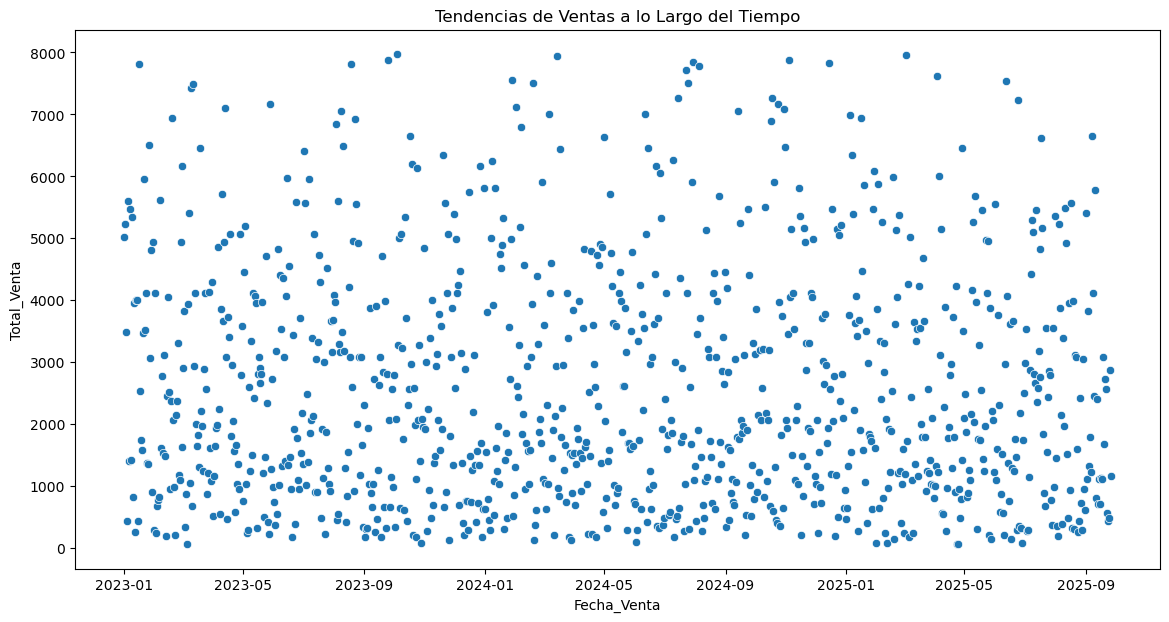

In [73]:
# Tendencias de ventas a lo largo del tiempo
ventas_por_fecha = df.groupby('Fecha_Venta')['Total_Venta'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Fecha_Venta', y='Total_Venta', data=ventas_por_fecha)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.show()

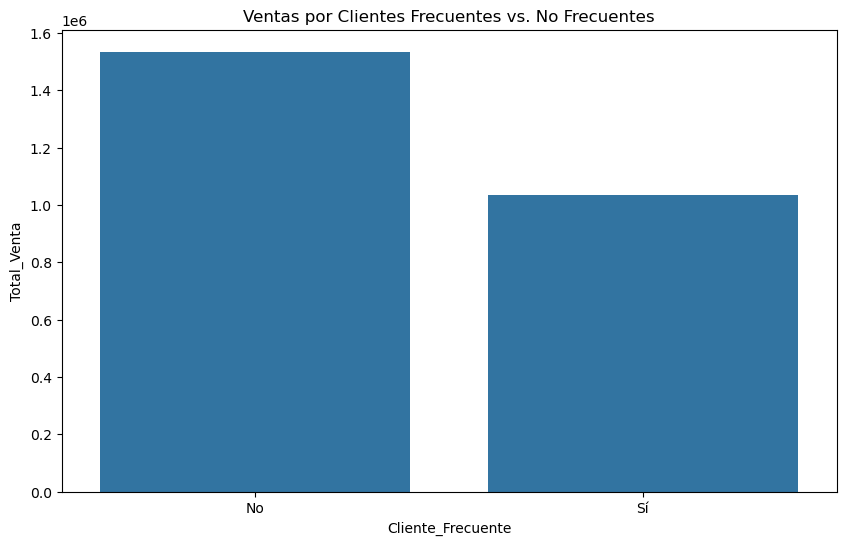

In [76]:
# Análisis de clientes frecuentes vs. no frecuentes
ventas_por_frecuencia = df.groupby('Cliente_Frecuente')['Total_Venta'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Cliente_Frecuente', y='Total_Venta', data=ventas_por_frecuencia)
plt.title('Ventas por Clientes Frecuentes vs. No Frecuentes')
plt.show()

In [ ]:
# 4. Segmentación y Patrones de Compra
# Identificación de patrones de compra en función del tiempo
df['dia_semana'] = df['fecha'].dt.day_name()
ventas_por_dia = df.groupby('dia_semana')['total_ventas'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='dia_semana', y='total_ventas', data=ventas_por_dia)
plt.title('Ventas por Día de la Semana')
plt.show()

In [ ]:

# Determinar si hay estacionalidad en las ventas
df['mes'] = df['fecha'].dt.month
ventas_por_mes = df.groupby('mes')['total_ventas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='total_ventas', data=ventas_por_mes)
plt.title('Ventas por Mes')
plt.show()

# Análisis de ticket promedio según cliente frecuente y método de pago
ticket_promedio = df.groupby(['frecuente', 'metodo_pago'])['total_ventas'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='metodo_pago', y='total_ventas', hue='frecuente', data=ticket_promedio)
plt.title('Ticket Promedio según Cliente Frecuente y Método de Pago')
plt.show()

# 5. Conclusiones y Recomendaciones
# Aquí se pueden agregar las conclusiones y recomendaciones basadas en los insights obtenidos del análisis.